# LDA

# Install and import relevant libraries

In [2]:
## https://developer.ibm.com/tutorials/awb-implementing-linear-discriminant-analysis-python/

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Read and load the data

In [3]:
# Define column names
##cls = ['Class', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6']

# Charger le DataFrame initial
dataset = pd.read_csv("../Ressources/Datasets/stand_norm_e1.txt", delimiter='\s+')

# Charger les nouvelles valeurs depuis y2_e1.txt
new_values = pd.read_csv("../Ressources/Datasets/y2_e1.txt", header=None, names=['New_Class'], delimiter='\s+')

# Remplacer les valeurs dans la colonne 'Class'
dataset['Class'] = new_values['New_Class']

dataset.head(900)

,Class,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6
0,0.0,220.110174,185.322913,714.120693,3719.146472,0.199611,0.807951
1,0.0,290.799141,371.267847,825.465771,235.087734,0.233832,0.710784
2,0.0,245.596011,432.266516,969.556869,4529.009906,0.266850,0.607620
3,0.0,266.347021,1400.323393,1503.693799,2897.194341,0.298691,0.572977
4,0.0,72.802457,107.825008,1057.444093,2901.767221,0.329382,0.613656
...,...,...,...,...,...,...,...
895,1.0,148.194510,63.003442,111.243387,2146.133778,0.590211,0.851058
896,1.0,251.932500,1015.425353,943.971254,1671.002889,0.581489,0.719200
897,1.0,283.682276,287.911775,1446.697365,3600.282008,0.575397,0.685539
898,1.0,136.548293,223.010801,577.462713,876.711276,0.568635,0.811406


In [4]:
# Divide the data set into features (X) and target variable (y)
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 5].values

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

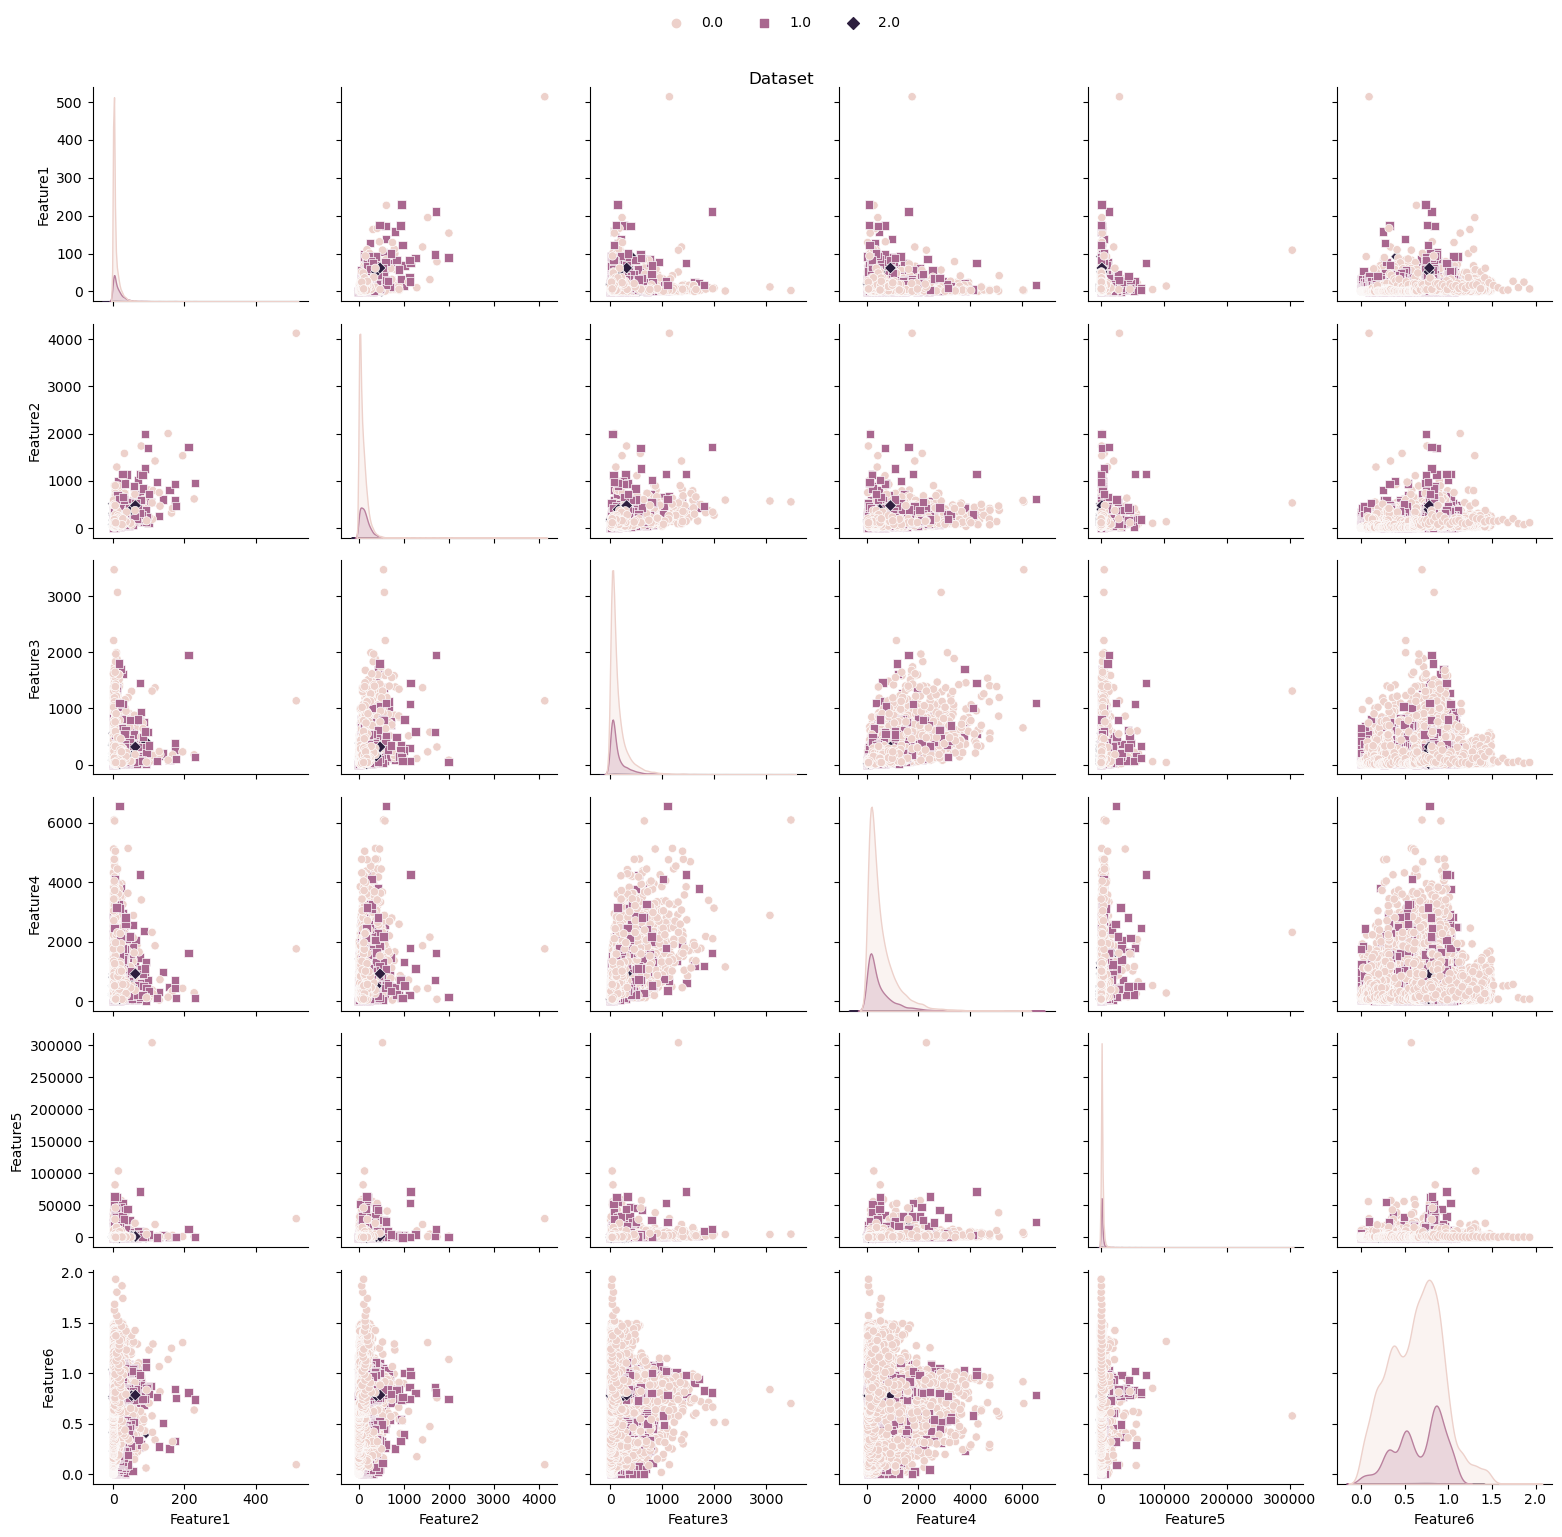

In [5]:
# Create a pair plot to visualize relationships between different features and species.
ax = sns.pairplot(dataset, hue='Class', markers=["o", "s", "D"])
plt.suptitle("Dataset")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

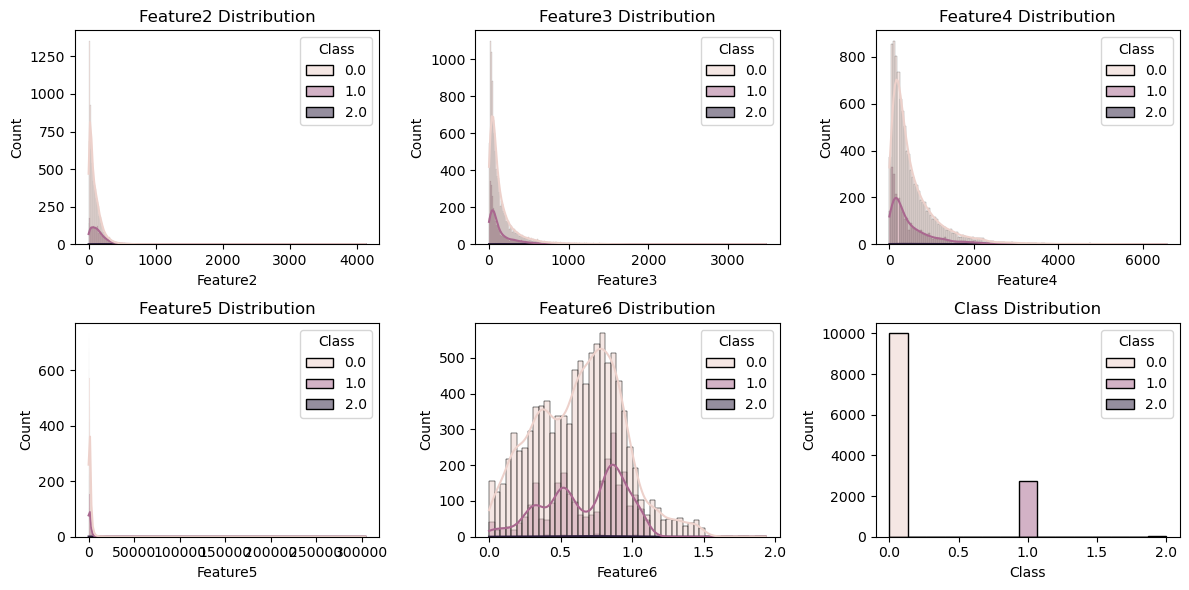

In [6]:
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(12, 6))
for i, feature in enumerate(dataset.columns[1:]):
    plt.subplot(2, 3, i + 1)  # Modified to accommodate all features
    sns.histplot(data=dataset, x=feature, hue='Class', kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

# Correlation heatmaps


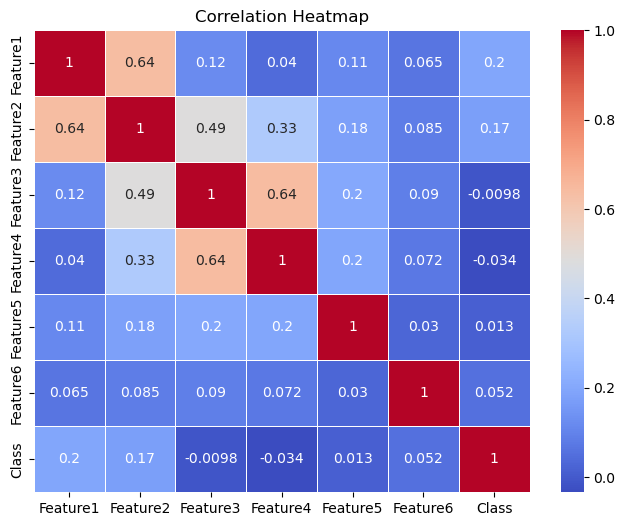

In [7]:
# Calculating the correlation matrix 
correlation_matrix = dataset.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Split the data set into training and testing sets


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Apply Linear Discriminant Analysis
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
## https://developer.ibm.com/tutorials/awb-implementing-linear-discriminant-analysis-python/

# Visualize the data

In [ ]:
# Visualize LDA components with class labels
tmp_df = pd.DataFrame(X_lda, columns=['LDA Component 1', 'LDA Component 2'])
tmp_df['Class'] = y

sns.FacetGrid(tmp_df, hue="Class", height=6).map(plt.scatter, 'LDA Component 1', 'LDA Component 2')
plt.legend(loc='upper right')
plt.show()

# Classify the data with random forest


In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)